In [7]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is F096-5E97

 Directory of D:\Projects\Optum Stratethon Season 4\backend\disease prediction

26-10-2022  13:38    <DIR>          .
25-10-2022  20:16    <DIR>          ..
26-10-2022  13:37    <DIR>          .ipynb_checkpoints
26-10-2022  13:38         1,375,335 Training.csv
26-10-2022  13:37                72 Untitled.ipynb
               2 File(s)      1,375,407 bytes
               3 Dir(s)  229,930,708,992 bytes free


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("dataset.csv")
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [10]:
df.shape

(4920, 133)

In [11]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [12]:
print(df["prognosis"].uniqueque())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [22]:
keys  = df["prognosis"].value_counts().keys()

In [17]:
values = df["prognosis"].value_counts().values

<BarContainer object of 41 artists>

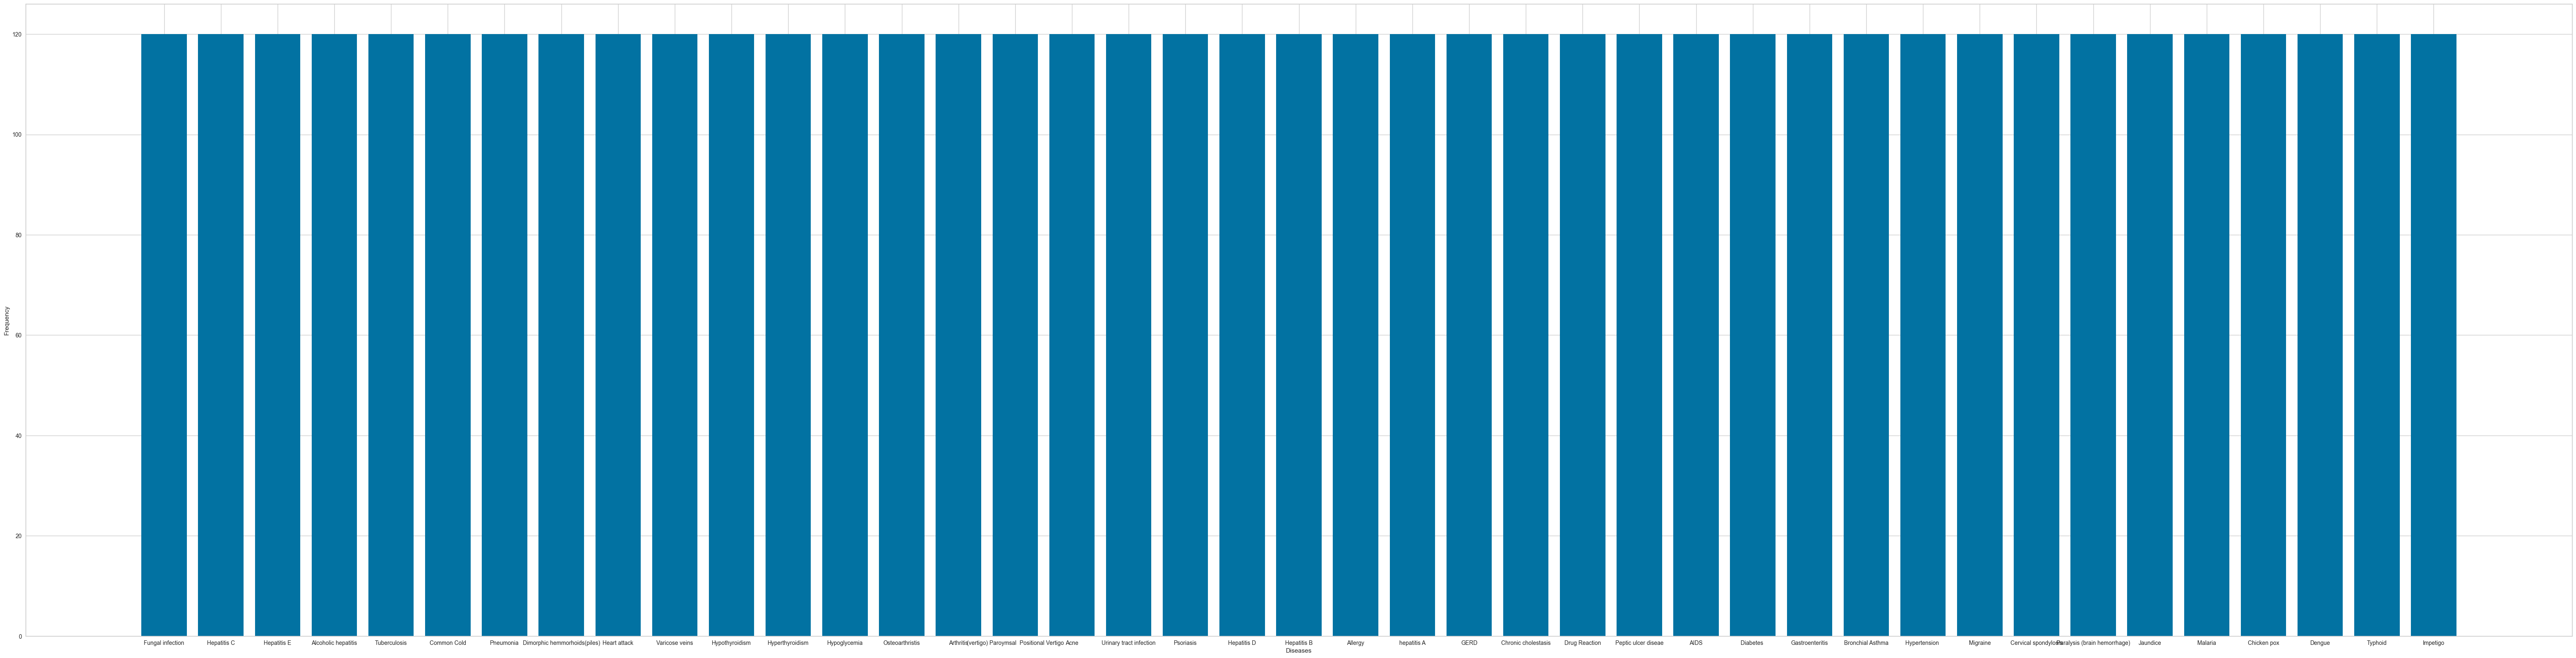

In [43]:
plt.figure(figsize = (80, 20))
plt.xlabel("Diseases")
plt.ylabel("Frequency")
plt.bar(keys, values)

# Conclusion : Dataset is balanced

### Checking for Models in PyCarret

### No Preprocessing

In [28]:
from pycaret.classification import *
s = setup(data=df, target='prognosis')


,Description,Value
0,Session id,6626
1,Target,prognosis
2,Target type,Multiclass
3,Target mapping,"(vertigo) Paroymsal Positional Vertigo: 0, AIDS: 1, Acne: 2, Alcoholic hepatitis: 3, Allergy: 4, Arthritis: 5, Bronchial Asthma: 6, Cervical spondylosis: 7, Chicken pox: 8, Chronic cholestasis: 9, Common Cold: 10, Dengue: 11, Diabetes : 12, Dimorphic hemmorhoids(piles): 13, Drug Reaction: 14, Fungal infection: 15, GERD: 16, Gastroenteritis: 17, Heart attack: 18, Hepatitis B: 19, Hepatitis C: 20, Hepatitis D: 21, Hepatitis E: 22, Hypertension : 23, Hyperthyroidism: 24, Hypoglycemia: 25, Hypothyroidism: 26, Impetigo: 27, Jaundice: 28, Malaria: 29, Migraine: 30, Osteoarthristis: 31, Paralysis (brain hemorrhage): 32, Peptic ulcer diseae: 33, Pneumonia: 34, Psoriasis: 35, Tuberculosis: 36, Typhoid: 37, Urinary tract infection: 38, Varicose veins: 39, hepatitis A: 40"
4,Original data shape,"(4920, 133)"
5,Transformed data shape,"(4920, 132)"
6,Transformed train set shape,"(3443, 132)"
7,Transformed test set shape,"(1477, 132)"
8,Numeric features,132
9,Preprocess,True


In [29]:
cm = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9800
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4470
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0400
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0570
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1500
et,Extra Trees Classifier,0.9997,1.0000,0.9997,0.9997,0.9997,0.9997,0.9997,0.1390
gbc,Gradient Boosting Classifier,0.9994,1.0000,0.9994,0.9995,0.9994,0.9994,0.9994,8.3200
lightgbm,Light Gradient Boosting Machine,0.9994,1.0000,0.9994,0.9995,0.9994,0.9994,0.9994,0.5210
dt,Decision Tree Classifier,0.9985,0.9993,0.9985,0.9988,0.9985,0.9985,0.9985,0.0420
ridge,Ridge Classifier,0.9983,0.0000,0.9983,0.9985,0.9982,0.9982,0.9982,0.0350


### Conclusion : Best Model is Logistic Regression

In [30]:
lrmodel = create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Learning Curve

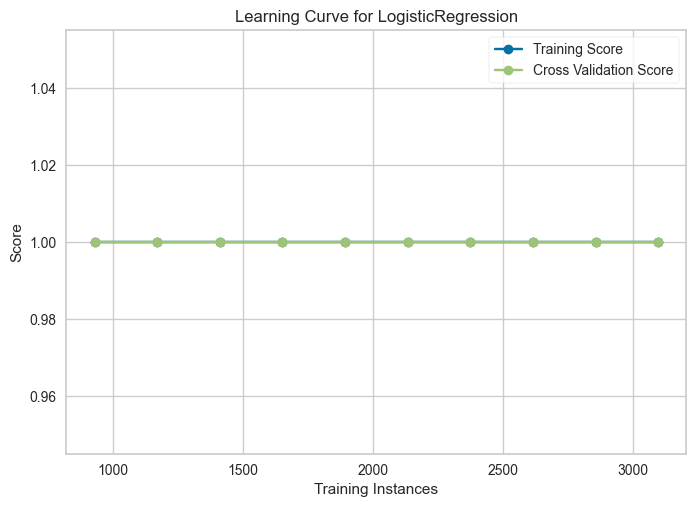

In [37]:
plot_model(lrmodel, plot='learning')


### Decision Boundary

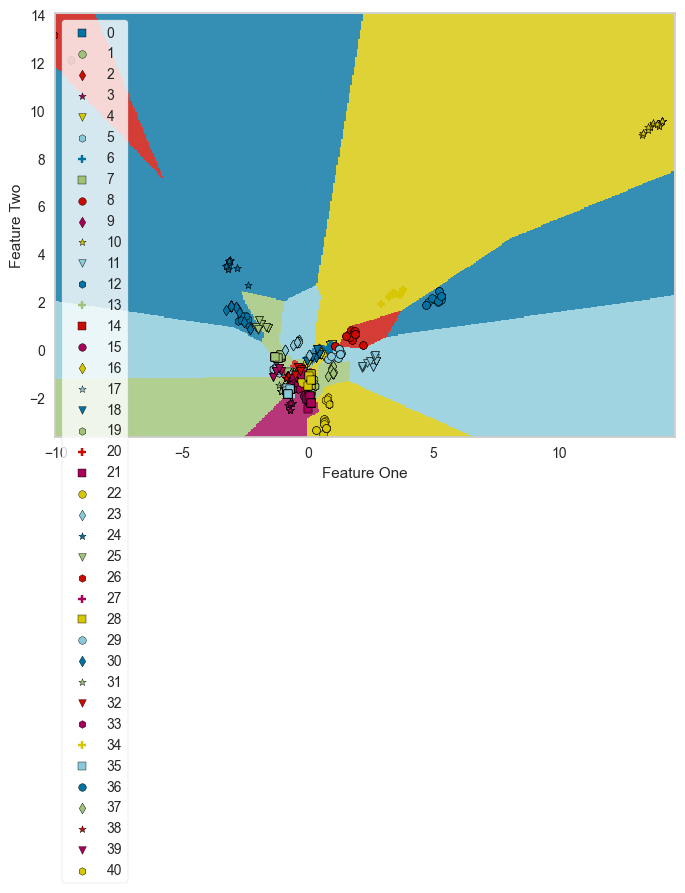

In [41]:
plot_model(lrmodel, plot='boundary')


### Feature Importance

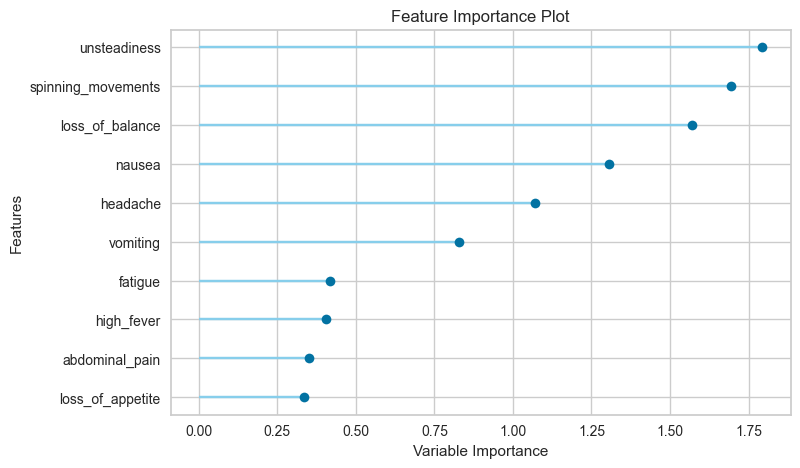

In [42]:
plot_model(lrmodel, plot='feature')


In [31]:
predict = predict_model(lrmodel, data = df.iloc[:10])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,0,0,0,nan,0.0000


In [32]:
predict

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,prediction_label,prediction_score
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9890
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9422
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9679
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9031
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.8923
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9422
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9679
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9031
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.8923
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fungal infection,Fungal infection,0.9890


In [33]:
sm = save_model(lrmodel, 'lrmodelfile')


Transformation Pipeline and Model Successfully Saved


In [ ]:
# Confius